In [5]:
import math
import numpy as np 
import pandas as pd 
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Bidirectional, Dropout, Conv1D, Lambda, SimpleRNN
import matplotlib.pyplot as plt 
import pandas_datareader as web
plt.style.use('fivethirtyeight')

In [6]:
from os.path import dirname
filename = '\yearcount2.csv'
dirPath = dirname(os.getcwd())+"\RNN\YearlyTendencies" + filename
dirPath

'c:\\Users\\David Fernandez\\Desktop\\cancerDataAnalysis\\RNN_Notebooks\\RNN\\YearlyTendencies\\yearcount2.csv'

In [7]:
df = pd.read_csv(dirPath)
df.head()

,unique_values,counts
0,2012-01-01,19
1,2012-01-02,16
2,2012-01-03,12
3,2012-01-04,12
4,2012-01-05,17


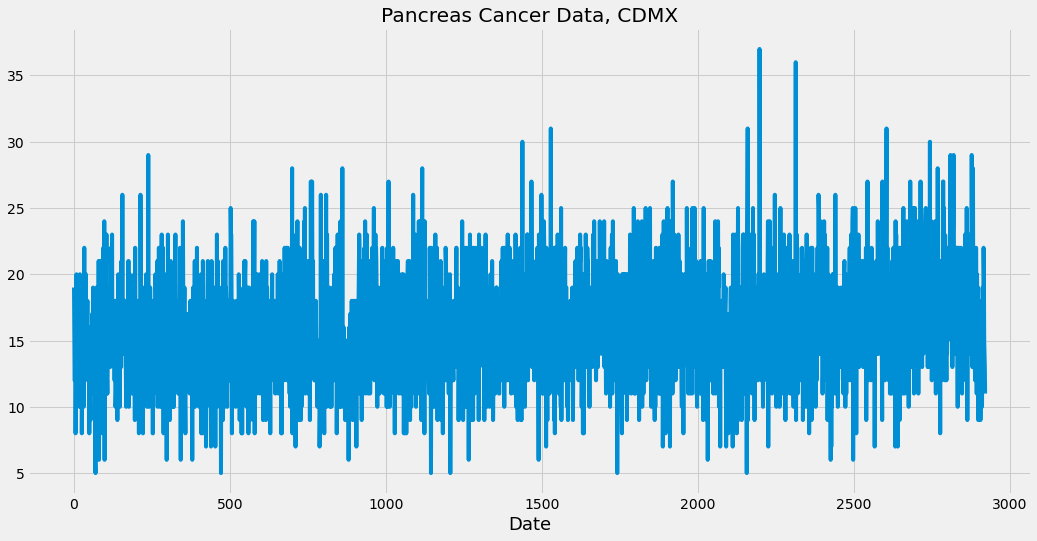

In [8]:
plt.figure(figsize=(16,8))
plt.title("Pancreas Cancer Data, CDMX")
plt.plot(df['counts'])
plt.xlabel('Date',fontsize=18)
plt.show()

In [6]:
data = df.filter(['counts'])
dataset = data.values
dataset = dataset.astype('float32')
training_data_len = math.ceil(len(dataset)*.88)
training_data_len

85

In [7]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

In [8]:
train_data = scaled_data[0:training_data_len,:]
look_backs = 70

x_train = []
y_train = []

for i in range(look_backs, len(train_data)):
    x_train.append(train_data[i-look_backs:i,0])
    y_train.append(train_data[i,0])
    if i<=look_backs+1:
        print(x_train)
        print(y_train)
        print()

[array([0.45882344, 0.34705877, 0.16470575, 0.07647061, 0.11176467,
       0.3647058 , 0.2352941 , 0.27647042, 0.2588234 , 0.17647052,
       0.31764698, 0.32941175, 0.4705882 , 0.15882349, 0.18235278,
       0.25294113, 0.31764698, 0.18823528, 0.5235293 , 0.38235283,
       0.35882354, 0.4705882 , 0.        , 0.32941175, 0.6470587 ,
       0.19411755, 0.5235293 , 0.29999995, 0.40588236, 0.31176472,
       0.35294104, 0.34705877, 0.14705873, 0.42941165, 0.42941165,
       0.56470585, 0.44705868, 0.20588231, 0.38235283, 0.2882352 ,
       0.28235292, 0.11176467, 0.15294123, 0.4941175 , 0.47647047,
       0.51176476, 0.40588236, 0.3411765 , 0.74117637, 0.6470587 ,
       0.58823514, 0.43529415, 0.58823514, 0.6529412 , 0.8705883 ,
       0.5705881 , 0.45294118, 0.43529415, 0.39999986, 0.72352934,
       0.62352943, 0.39999986, 0.63529396, 0.6764705 , 0.7058823 ,
       0.6058824 , 0.72352934, 0.5999999 , 0.59411764, 0.85294104],
      dtype=float32)]
[0.5294118]

[array([0.45882344, 0.347

In [9]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(15, 70, 1)

# LSTM


In [90]:
model = Sequential() #initialize sequential model
model.add(LSTM(64,input_shape=(x_train.shape[1],1), return_sequences=True)) #LSTM layer with 32 neurons
model.add(LSTM(32, return_sequences=True)) #LSTM layer with 32 neurons
model.add(LSTM(32)) #LSTM layer with 32 neurons
model.add(Dense(16,activation='relu')) #Dense layer with 16 neurons
model.add(Dense(8,activation='relu')) #Dense layer with 8 neurons
model.add(Dense(1,activation='linear')) #Dense output layer with 1 neuron, linear activation

In [91]:
model.compile(loss='mae', optimizer='Adam',metrics=["mse","mae"])

# RNN

In [32]:
model = Sequential() #initialize model
model.add(SimpleRNN(64, input_shape=(x_train.shape[1],1), return_sequences=True)) #recurrent layer 1, 64 neurons
model.add(SimpleRNN(32, return_sequences=True)) #recurrent layer 2, 32 neurons
model.add(SimpleRNN(16)) #recurrent layer 3, 16 neurons|
model.add(Dense(8,activation='tanh')) #Dense layer, 8 neurons w/ tanh activation
model.add(Dense(1,activation='linear')) #output dense layer (1 neuron) w/ linear activation

In [33]:
model.compile(loss='mae', optimizer='Adam', metrics=["mse","mae"])

# CONV

In [271]:
tf.keras.backend.clear_session()
model = Sequential([
    Conv1D(filters=60, kernel_size=5, strides=1, padding="causal", activation="relu", input_shape=(x_train.shape[1],1)),
    LSTM(60, return_sequences=True),
    LSTM(60),
    Dense(30, activation='relu'),
    Dense(10, activation='relu'),
    Dense(1),
    Lambda(lambda x: x* 400)
])

In [17]:
optimizer = tf.keras.optimizers.SGD(lr=1e-6, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(), optimizer=optimizer, metrics=["rms","mae"])

# FIT

In [34]:
history = model.fit(x_train,y_train, epochs=100)

Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: 0.6763 - mse: 0.5145 - mae: 0.6763
Epoch 2/100
1/1 [==============================] - 0s 26ms/step - loss: 0.3343 - mse: 0.1708 - mae: 0.3343
Epoch 3/100
1/1 [==============================] - 0s 20ms/step - loss: 0.2645 - mse: 0.1021 - mae: 0.2645
Epoch 4/100
1/1 [==============================] - 0s 27ms/step - loss: 0.2777 - mse: 0.1207 - mae: 0.2777
Epoch 5/100
1/1 [==============================] - 0s 20ms/step - loss: 0.2121 - mse: 0.0734 - mae: 0.2121
Epoch 6/100
1/1 [==============================] - 0s 21ms/step - loss: 0.1586 - mse: 0.0319 - mae: 0.1586
Epoch 7/100
1/1 [==============================] - 0s 34ms/step - loss: 0.1560 - mse: 0.0334 - mae: 0.1560
Epoch 8/100
1/1 [==============================] - 0s 26ms/step - loss: 0.1548 - mse: 0.0340 - mae: 0.1548
Epoch 9/100
1/1 [==============================] - 0s 28ms/step - loss: 0.1181 - mse: 0.0204 - mae: 0.1181
Epoch 10/100
1/1 [=====================

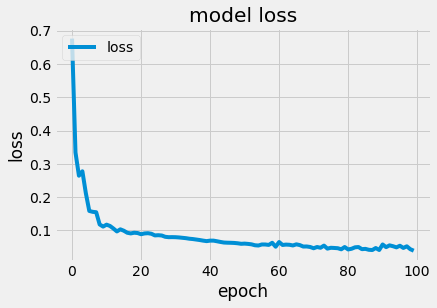

In [35]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss'], loc='upper left')
plt.show()

# Predict

In [36]:
test_data = scaled_data[training_data_len - look_backs: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(look_backs, len(test_data)):
    x_test.append(test_data[i-look_backs:i, 0])

In [37]:
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [38]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [39]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
valid

<ipython-input-39-fb6554dbe6ad>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


,counts,Predictions
85,459,503.094116
86,469,489.939026
87,435,470.413361
88,550,490.012726
89,501,554.627380
90,505,444.361603
91,526,529.322388
92,448,468.662415
93,518,530.605164
94,515,503.581604


<ipython-input-40-50411a36d549>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


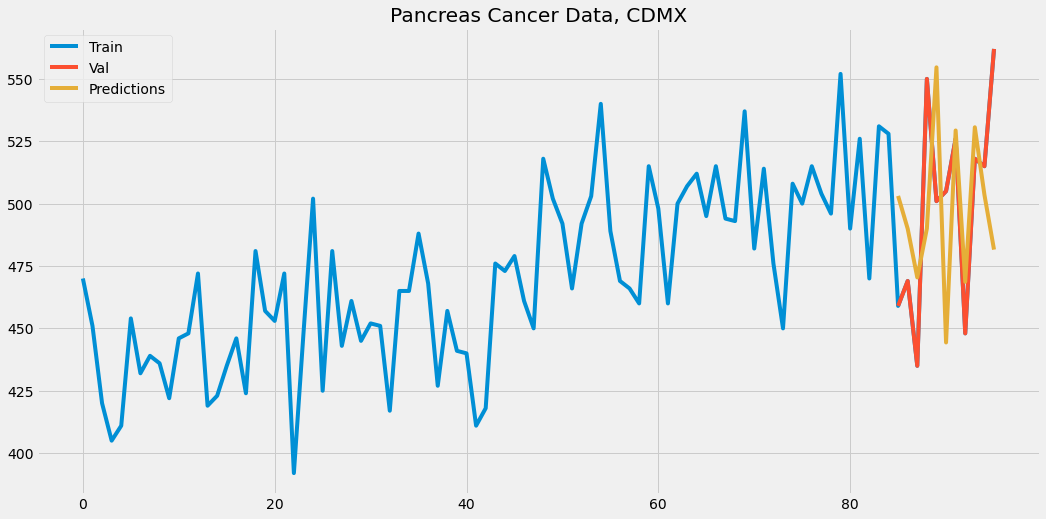

In [40]:
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title("Pancreas Cancer Data, CDMX")
plt.plot(df['counts'])
plt.plot(valid[['counts', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'])
plt.show()

# Complete


5.7656e-08 - mae: 1.8023e-04
Epoch 1163/1350
3/3 [==============================] - 0s 4ms/step - loss: 7.5614e-08 - mae: 2.0287e-04
Epoch 1164/1350
3/3 [==============================] - 0s 4ms/step - loss: 1.0520e-07 - mae: 2.3882e-04
Epoch 1165/1350
3/3 [==============================] - 0s 4ms/step - loss: 1.8362e-07 - mae: 2.3752e-04
Epoch 1166/1350
3/3 [==============================] - 0s 4ms/step - loss: 1.9426e-07 - mae: 3.3013e-04
Epoch 1167/1350
3/3 [==============================] - 0s 4ms/step - loss: 7.8695e-08 - mae: 2.2849e-04
Epoch 1168/1350
3/3 [==============================] - 0s 4ms/step - loss: 8.0773e-08 - mae: 2.1044e-04
Epoch 1169/1350
3/3 [==============================] - 0s 4ms/step - loss: 1.6900e-07 - mae: 2.6677e-04
Epoch 1170/1350
3/3 [==============================] - 0s 4ms/step - loss: 1.0915e-07 - mae: 2.2336e-04
Epoch 1171/1350
3/3 [==============================] - 0s 4ms/step - loss: 3.3802e-07 - mae: 4.2627e-04
Epoch 1172/1350
3/3 [==============

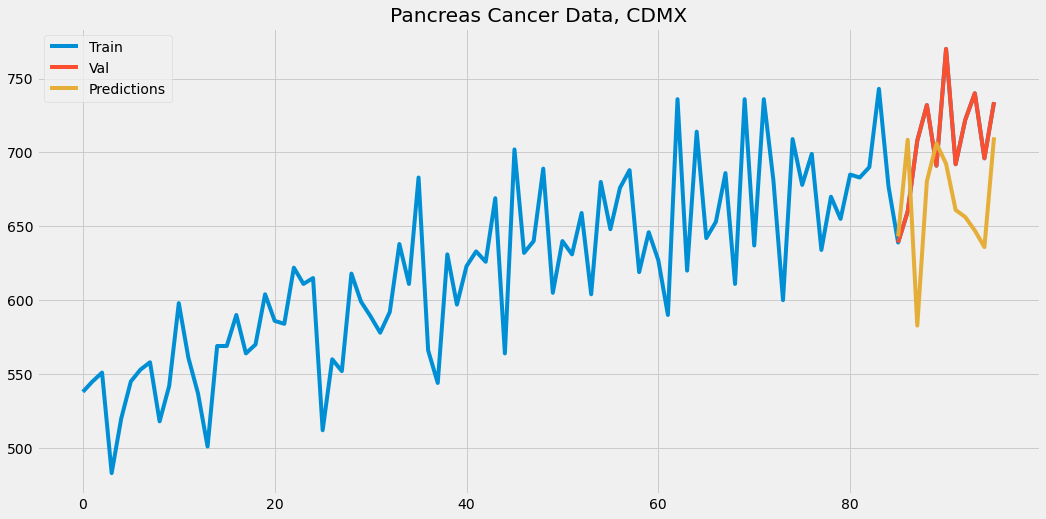

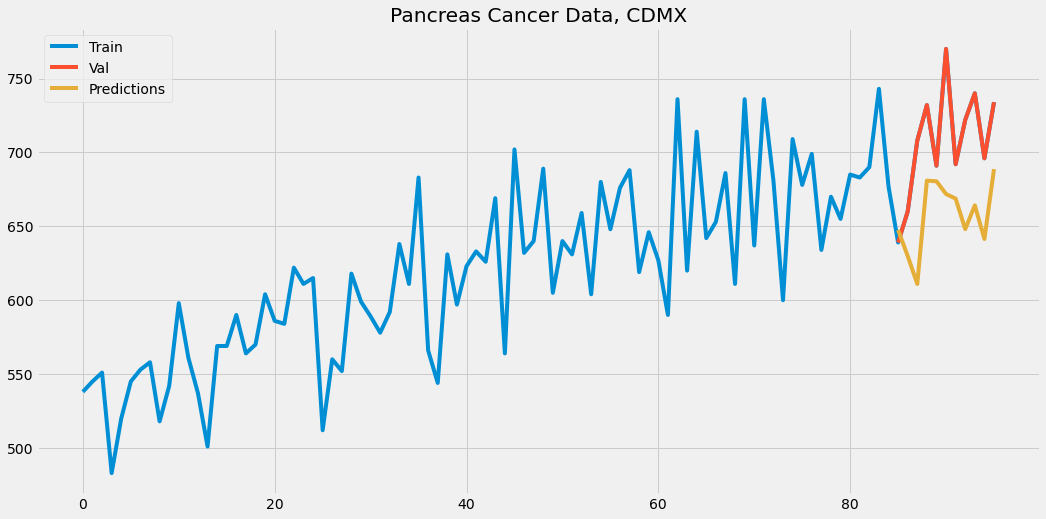

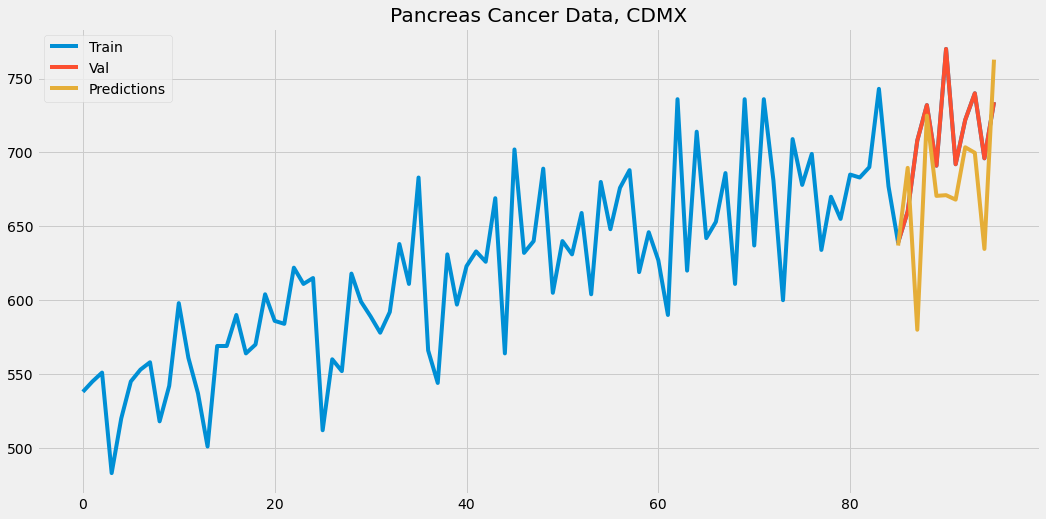

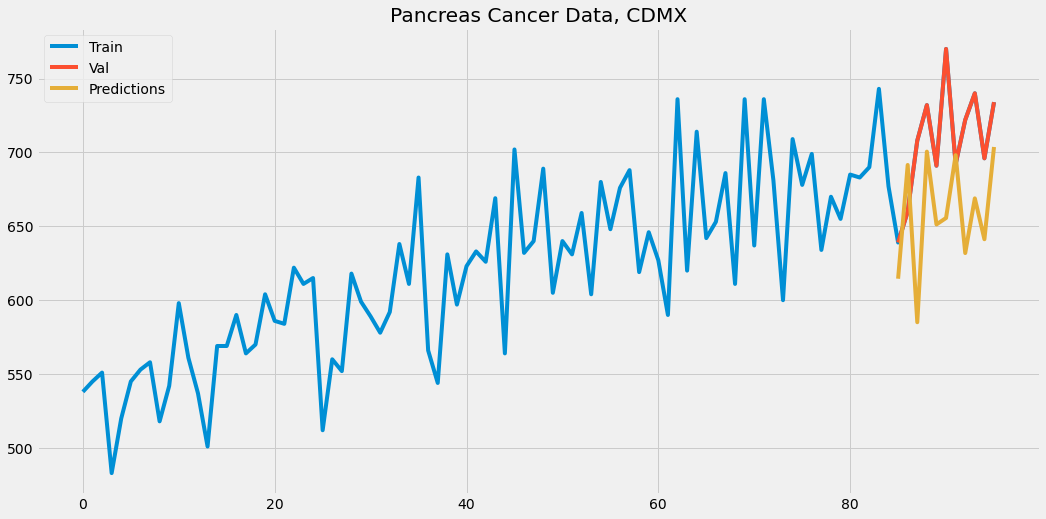

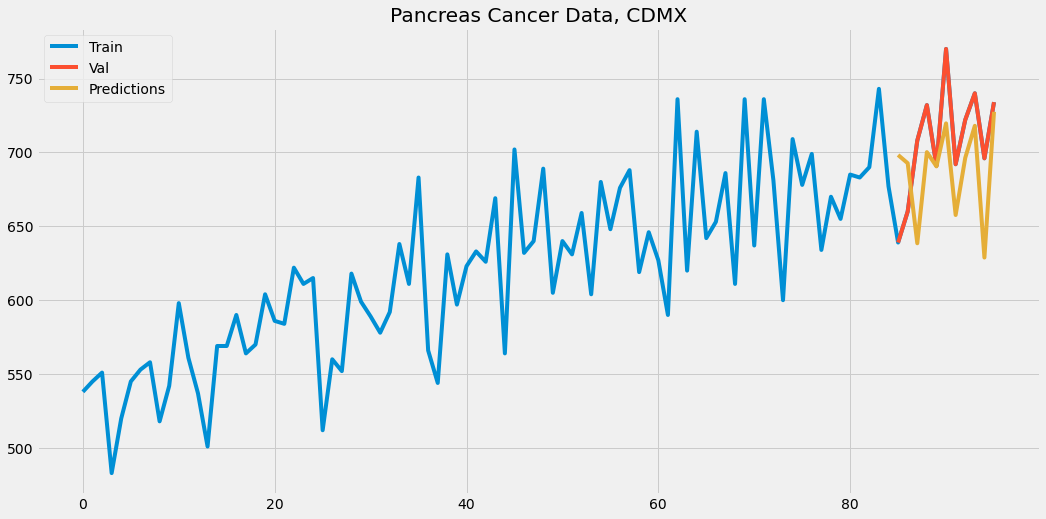

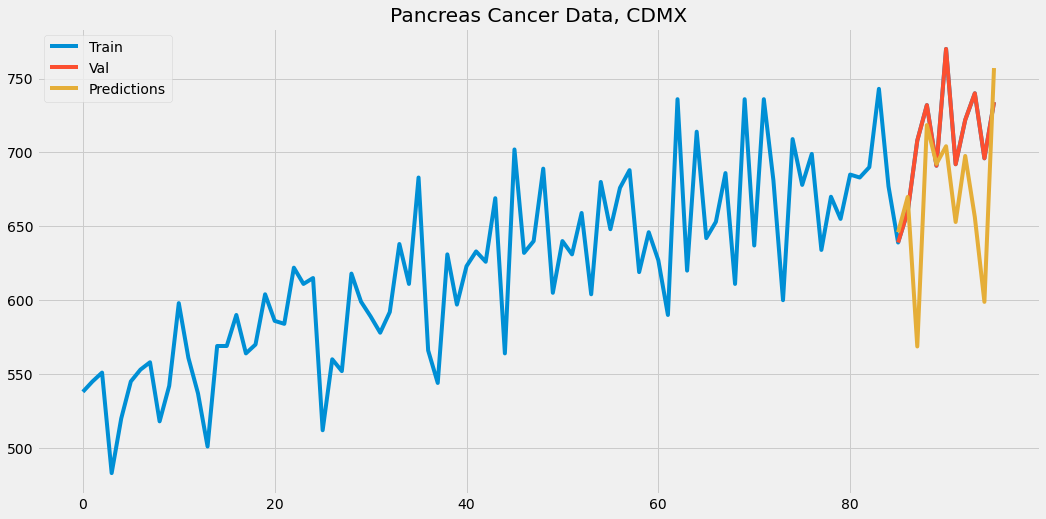

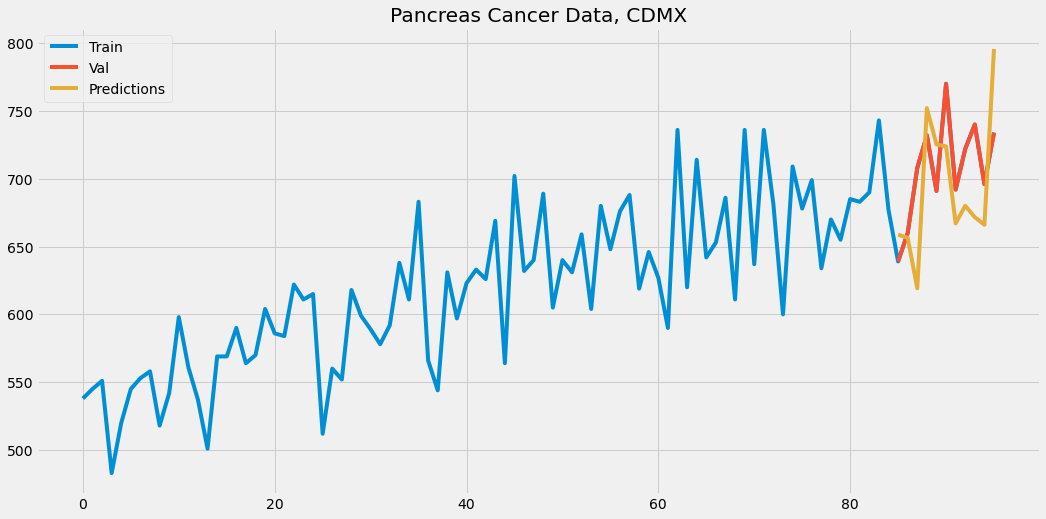

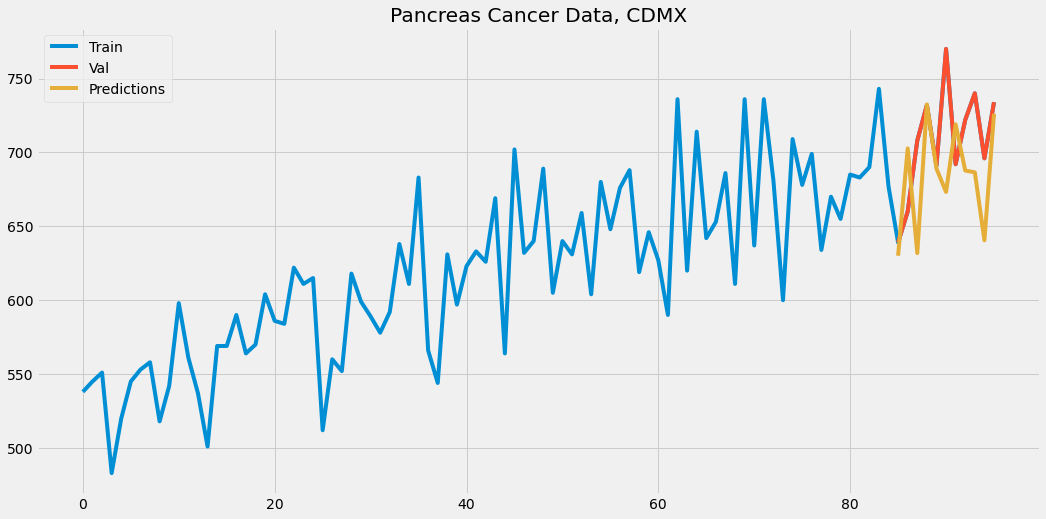

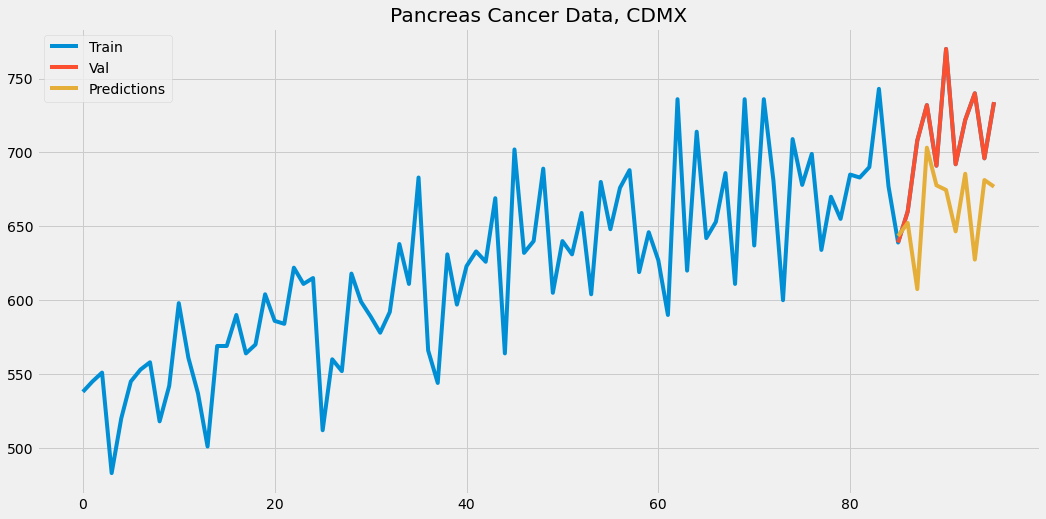

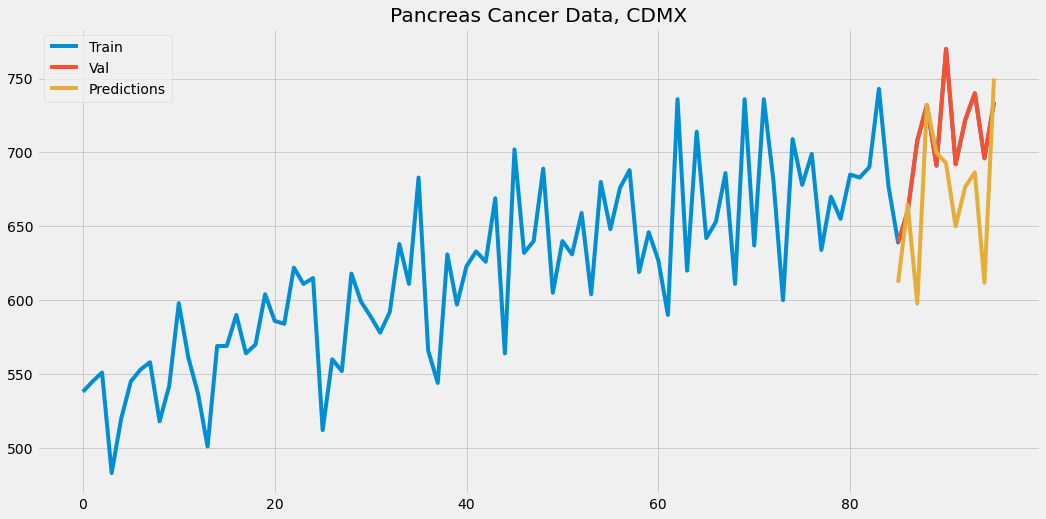

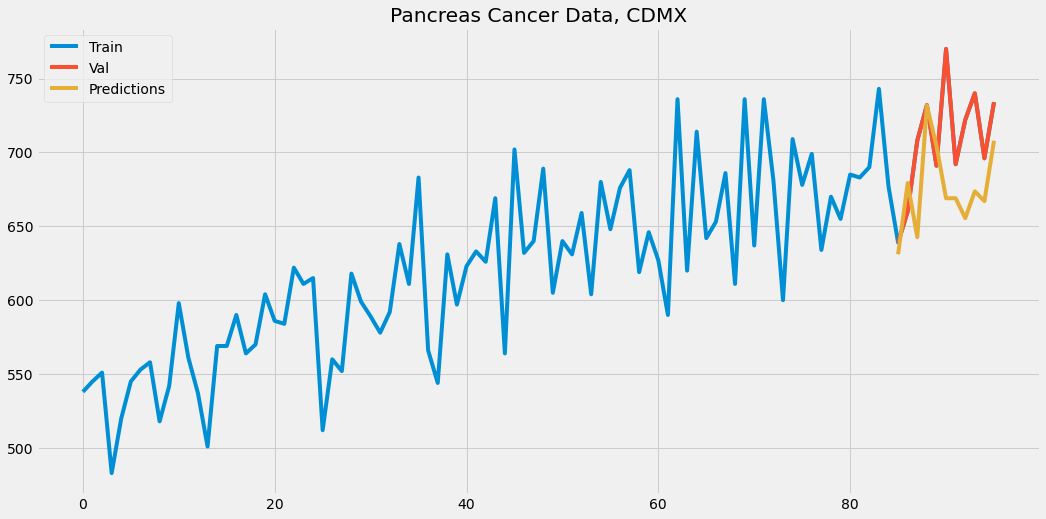

In [8]:
for i in range(0,11,1):
    model = Sequential() #initialize model
    model.add(SimpleRNN(64, input_shape=(x_train.shape[1],1), return_sequences=True)) #recurrent layer 1, 64 neurons
    model.add(SimpleRNN(32, return_sequences=True)) #recurrent layer 2, 32 neurons
    model.add(SimpleRNN(16)) #recurrent layer 3, 16 neurons|
    model.add(Dense(8,activation='tanh')) #Dense layer, 8 neurons w/ tanh activation
    model.add(Dense(4,activation='tanh')) #Dense layer, 8 neurons w/ tanh activation
    model.add(Dense(1,activation='linear')) #output dense layer (1 neuron) w/ linear activation
    model.compile(loss='mse', optimizer='Adam', metrics=['mae'])

    eps = 1340+i
    model.fit(x_train,y_train, epochs=eps)

    test_data = scaled_data[training_data_len - 11: , :]
    x_test = []
    y_test = dataset[training_data_len:, :]
    for i in range(11, len(test_data)):
        x_test.append(test_data[i-11:i, 0])

    x_test = np.array(x_test)
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

    predictions = model.predict(x_test)
    predictions = scaler.inverse_transform(predictions)

    train = data[:training_data_len]
    valid = data[training_data_len:]
    valid['Predictions'] = predictions


    plt.figure(figsize=(16,8))
    plt.title("Pancreas Cancer Data, CDMX")
    plt.plot(df['counts'])
    plt.plot(valid[['counts', 'Predictions']])
    plt.legend(['Train', 'Val', 'Predictions'])  
    figname = '1400\\'+str(eps)+'Fig.png'
    plt.savefig(figname)